In [301]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

#Importing DataCleaning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


#Importing Predictive Models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import joblib

In [164]:
#Loading Dataset
df = pd.read_csv("Fligh_prices_dataset.csv")
df.head()

,Unnamed: 0,Name,Duration,Layovers,Departure_time,Arrival_time,Source,Destination,Details,Price
0,0,Air Asia,5h 50m,1 Stop,08:20,14:10,New Delhi,Mumbai,eCash 250,"5,949"
1,1,Air Asia,6h 25m,1 Stop,20:00,02:25\n+ 1 day,New Delhi,Mumbai,eCash 250,"5,949"
2,2,Air Asia,10h 30m,1 Stop,20:45,07:15\n+ 1 day,New Delhi,Mumbai,Emissions: 303 Kg CO2\neCash 250,"5,949"
3,3,Air Asia,11h 00m,1 Stop,09:35,20:35,New Delhi,Mumbai,Emissions: 303 Kg CO2\neCash 250,"5,949"
4,4,Air Asia,11h 40m,1 Stop,20:00,07:40\n+ 1 day,New Delhi,Mumbai,eCash 250,"5,949"


In [165]:
#shape of dataset
df.shape

(2139, 10)

In [166]:
#Drop unncessary column
df.drop("Unnamed: 0", axis =1, inplace = True)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            2139 non-null   object
 1   Duration        2139 non-null   object
 2   Layovers        2139 non-null   object
 3   Departure_time  2139 non-null   object
 4   Arrival_time    2139 non-null   object
 5   Source          2139 non-null   object
 6   Destination     2139 non-null   object
 7   Details         2139 non-null   object
 8   Price           2139 non-null   object
dtypes: object(9)
memory usage: 150.5+ KB


In [168]:
df.isnull().sum()

Name              0
Duration          0
Layovers          0
Departure_time    0
Arrival_time      0
Source            0
Destination       0
Details           0
Price             0
dtype: int64

In [169]:
#Checking for duplicate fields/records

df.duplicated().sum()

75

In [170]:
# Dropping Duplicates
df = df.drop_duplicates()

In [171]:
len(df)

2064

In [172]:
df.describe()

,Name,Duration,Layovers,Departure_time,Arrival_time,Source,Destination,Details,Price
count,2064,2064,2064,2064,2064,2064,2064,2064,2064
unique,8,330,5,250,402,10,10,166,638
top,Vistara,2h 10m,1 Stop,07:00,19:55,New Delhi,New Delhi,eCash 250,"5,943"
freq,523,45,1440,52,35,447,445,1002,55


# Data Processing/Cleaning:

In [173]:
#changing object to to_datetime object
df['Departure_time'] = pd.to_datetime(df['Departure_time'])
df['Dep_hours'] = df['Departure_time'].dt.hour
df['Dep_minutes'] = df['Departure_time'].dt.minute

In [174]:
##changing object datatype to datetime object using to_datetime function 

df['Arrival_time'] = df['Arrival_time'].str.split("\n").str[0]
df['Arrival_time'] = pd.to_datetime(df['Arrival_time'])

In [175]:
#divide into Hour - Minute - columns
df['Arr_hours'] = df['Arrival_time'].dt.hour
df['Arr_minutes'] = df['Arrival_time'].dt.minute

In [176]:
#Separating hour and minutes from duration column usin split function

df['Dur_hours'] = df['Duration'].str.split('h').str[0]
df['Dur_minutes'] = df['Duration'].str.split('h').str[1]
df['Dur_minutes'] = df['Dur_minutes'].str.split('m').str[0]

In [177]:
#extracting only integers

df['Layovers'] = df['Layovers'].str.split(" ").str[0]
df['Layovers'] = df['Layovers'].replace("Non", "0")

In [178]:
df.sample(5)

,Name,Duration,Layovers,Departure_time,Arrival_time,Source,Destination,Details,Price,Dep_hours,Dep_minutes,Arr_hours,Arr_minutes,Dur_hours,Dur_minutes
816,SpiceJet,13h 15m,1,2022-02-21 19:30:00,2022-02-21 08:45:00,Mumbai,Kolkata,eCash 250,"7,518",19,30,8,45,13,15
858,IndiGo,6h 40m,1,2022-02-21 17:30:00,2022-02-21 00:10:00,Mumbai,Kolkata,eCash 250,"10,353",17,30,0,10,6,40
1379,IndiGo,8h 45m,1,2022-02-21 06:55:00,2022-02-21 15:40:00,Ahmedabad,Bangalore,eCash 250,"5,901",6,55,15,40,8,45
691,Air Asia,8h 40m,2,2022-02-21 12:25:00,2022-02-21 21:05:00,Jaipur,Kolkata,eCash 250,"6,777",12,25,21,5,8,40
938,Go First,5h 00m,1,2022-02-21 16:25:00,2022-02-21 21:25:00,Kolkata,Mumbai,eCash 250,"7,958",16,25,21,25,5,00


In [179]:
# Replacing commas from price with no space
df['Price'] = df.Price.str.replace(",", "")

In [180]:
# dropping Details column as it's difficult to separate it into different categories
df.drop(columns = ['Duration','Departure_time','Arrival_time',"Details"], axis = 1,inplace = True)

In [181]:
df.shape

(2064, 11)

In [184]:
df.sample(10)

,Name,Layovers,Source,Destination,Price,Dep_hours,Dep_minutes,Arr_hours,Arr_minutes,Dur_hours,Dur_minutes
417,Vistara,2,Bangalore,Hyderabad,15090,11,30,20,55,9,25
1722,SpiceJet,0,New Delhi,Goa,7424,19,30,22,0,2,30
154,IndiGo,1,Mumbai,New Delhi,5939,9,25,17,35,8,10
1195,Air India,1,New Delhi,Chennai,12780,10,40,7,20,20,40
988,Vistara,1,Kolkata,Mumbai,10425,7,10,16,30,9,20
15,Go First,0,New Delhi,Mumbai,5955,7,0,9,10,2,10
1153,Vistara,1,New Delhi,Chennai,11520,17,45,23,5,5,20
831,Air India,1,Mumbai,Kolkata,9618,20,15,8,5,11,50
1962,Air India,1,Goa,Mumbai,26107,14,10,9,5,18,55
2129,Air India,1,Mumbai,Goa,25893,7,0,13,25,6,25


# EDA:

In [186]:
df['Price'] = df['Price'].astype('int32')
df['Dur_hours']=df['Dur_hours'].astype('int32')
df['Dur_minutes']=df['Dur_minutes'].astype('int32')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2138
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         2064 non-null   object
 1   Layovers     2064 non-null   object
 2   Source       2064 non-null   object
 3   Destination  2064 non-null   object
 4   Price        2064 non-null   int32 
 5   Dep_hours    2064 non-null   int64 
 6   Dep_minutes  2064 non-null   int64 
 7   Arr_hours    2064 non-null   int64 
 8   Arr_minutes  2064 non-null   int64 
 9   Dur_hours    2064 non-null   int32 
 10  Dur_minutes  2064 non-null   int32 
dtypes: int32(3), int64(4), object(4)
memory usage: 169.3+ KB


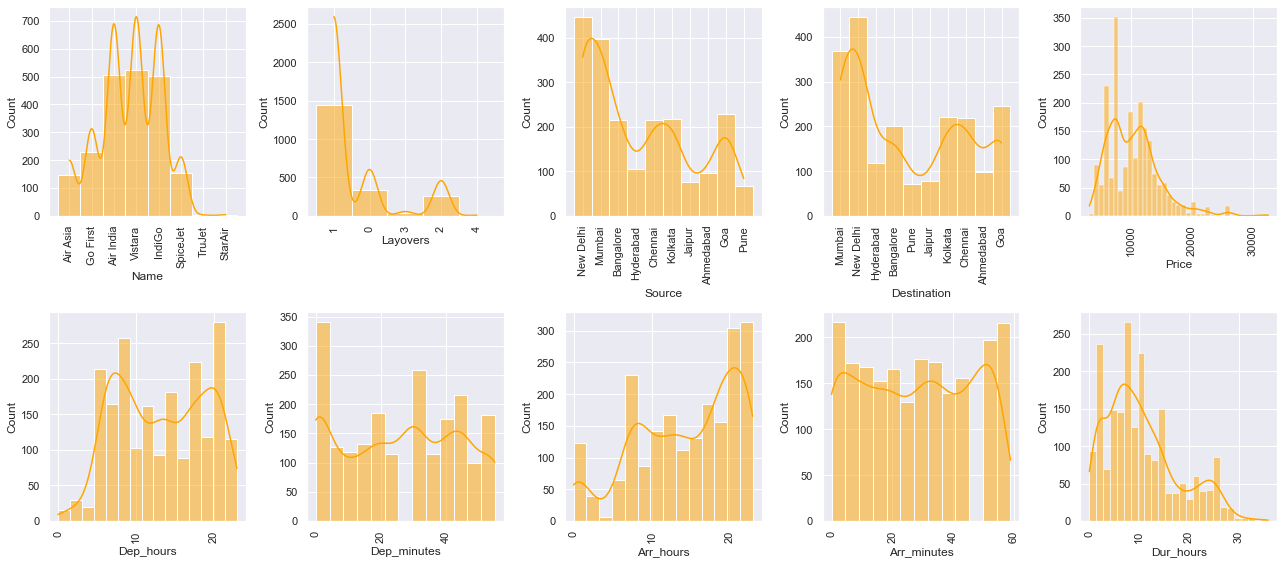

In [218]:
plt.figure(figsize=(18,8))
x=1
for i in df.columns:
    if x<=10:
        plt.subplot(2,5,x)
        sns.histplot(df[i],color="orange",stat="count",kde=True)
        plt.xticks(rotation=90)
        x+=1
plt.tight_layout()
plt.show()

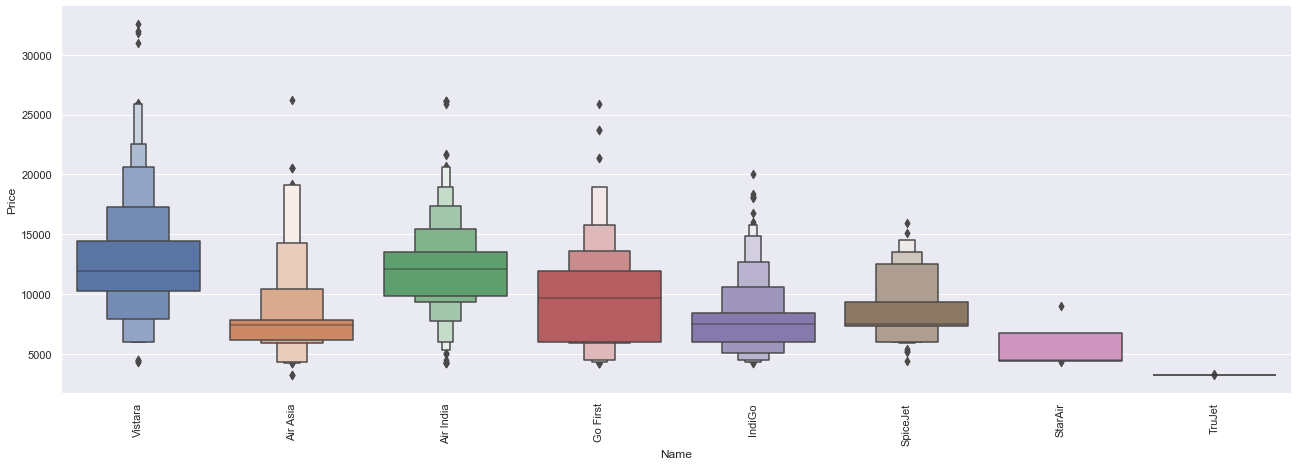

In [199]:
sns.catplot(y = "Price", x = "Name", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x504 with 0 Axes>

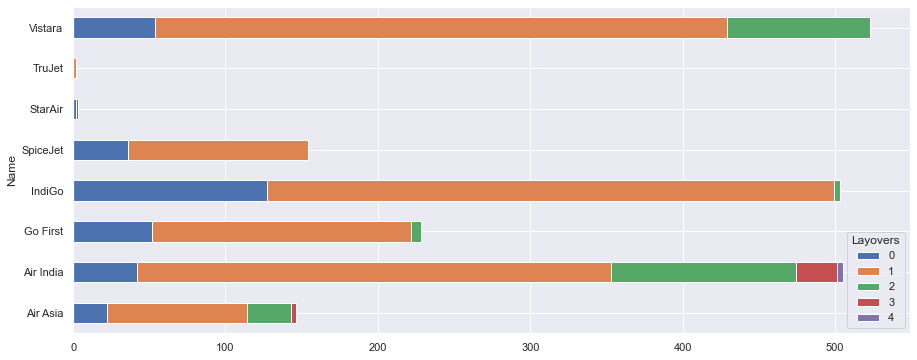

In [211]:
plt.figure(figsize=(15,7))
pd.crosstab(df['Name'], df['Layovers']).plot(kind='barh', stacked=True,figsize=(15,6))
plt.show()

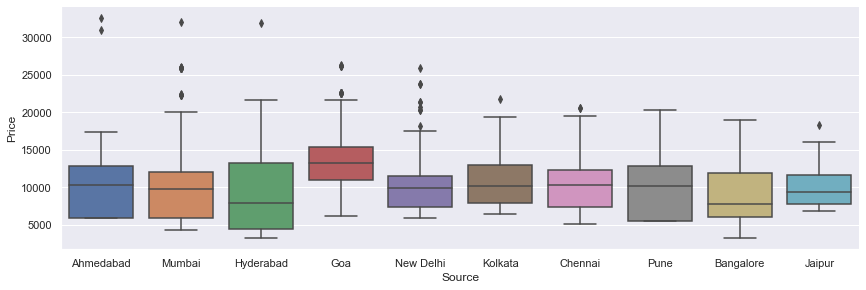

In [213]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

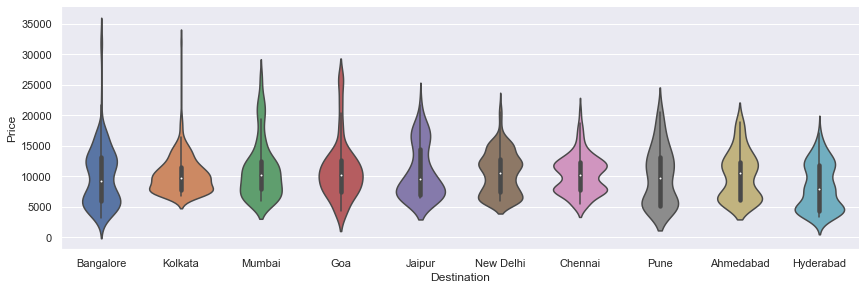

In [214]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

In [219]:
df.columns

Index(['Name', 'Layovers', 'Source', 'Destination', 'Price', 'Dep_hours',
       'Dep_minutes', 'Arr_hours', 'Arr_minutes', 'Dur_hours', 'Dur_minutes'],
      dtype='object')

<AxesSubplot:xlabel='Dep_hours', ylabel='Price'>

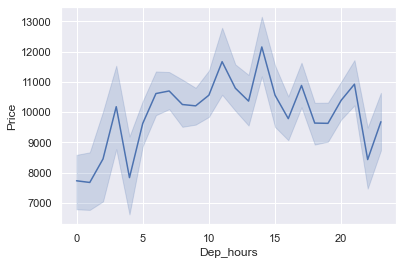

In [223]:
sns.lineplot(x="Dep_hours",y="Price",data=df,palette="viridis",markers="^",)

<AxesSubplot:xlabel='Arr_hours', ylabel='Price'>

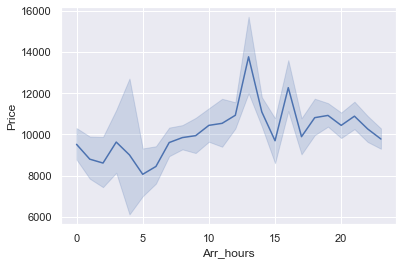

In [224]:
sns.lineplot(x="Arr_hours",y="Price",data=df)

Text(0.5, 1.0, 'Prices relation to Duration(hour)')

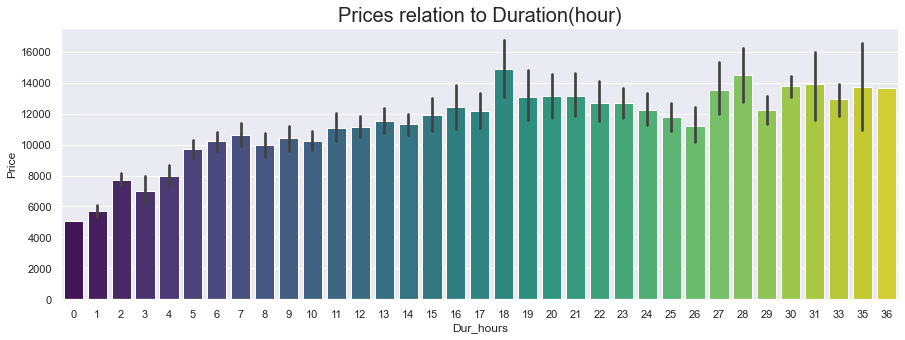

In [227]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, y = 'Price', x = 'Dur_hours',palette="viridis")
plt.title("Prices relation to Duration(hour)",fontsize = 20)

<Figure size 1080x576 with 0 Axes>

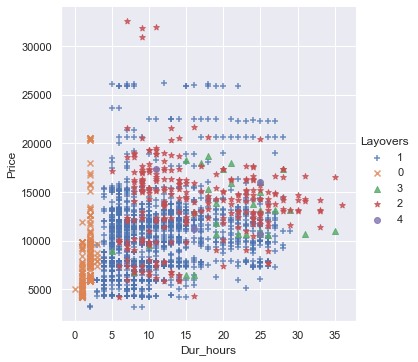

In [240]:
plt.figure(figsize=(15,8))
sns.lmplot(x='Dur_hours', y='Price', hue='Layovers', 
           data=df,fit_reg=False,markers=["+","x","^","*","o"])
plt.show()

<AxesSubplot:xlabel='Name', ylabel='Price'>

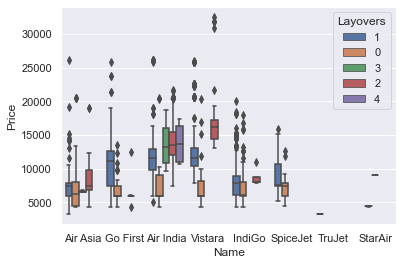

In [242]:
sns.boxplot(x="Name", y="Price", hue='Layovers', data=df)

# Outlier check:

In [273]:
df["Layovers"]=df["Layovers"].astype("int32")

In [274]:
num_df=df.select_dtypes(exclude="object")

In [276]:
z = np.abs(zscore(num_df))
z.shape

(2064, 8)

In [277]:
df_new=df[(z<3).all(axis=1)]

In [278]:
df_new.shape, df.shape

((2000, 11), (2064, 11))

In [279]:
#Data Loss percentage
64/2064 *100

3.10077519379845

# Check Skewness:

In [280]:
df_new.skew()

Layovers      -0.040080
Price          0.721480
Dep_hours     -0.021965
Dep_minutes   -0.010169
Arr_hours     -0.508676
Arr_minutes   -0.018839
Dur_hours      0.803922
Dur_minutes    0.066278
dtype: float64

In [281]:
#skewness to be reduced in Dur_hours
df_new["Dur_hours"]=np.sqrt(df_new['Dur_hours'])
df_new["Dur_hours"].skew()

0.10792563128658161

In [282]:
df_new.skew()

Layovers      -0.040080
Price          0.721480
Dep_hours     -0.021965
Dep_minutes   -0.010169
Arr_hours     -0.508676
Arr_minutes   -0.018839
Dur_hours      0.107926
Dur_minutes    0.066278
dtype: float64

In [283]:
df_new.describe()

,Layovers,Price,Dep_hours,Dep_minutes,Arr_hours,Arr_minutes,Dur_hours,Dur_minutes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.954500,10138.250500,13.283000,26.050000,14.39900,27.859500,3.008280,26.829500
std,0.536259,3786.098083,5.735971,18.074453,6.67346,18.054133,1.123335,16.882563
min,0.000000,3196.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,7412.000000,8.000000,10.000000,9.00000,10.000000,2.236068,10.000000
50%,1.000000,9840.000000,13.000000,30.000000,16.00000,30.000000,3.000000,25.000000
75%,1.000000,12352.000000,19.000000,40.000000,20.00000,45.000000,3.741657,40.000000
max,2.000000,22537.000000,23.000000,55.000000,23.00000,59.000000,5.567764,55.000000


# Encoding:

In [287]:
cat_df=df_new.select_dtypes("object")

In [288]:
cat_df.shape

(2000, 3)

In [294]:
le=LabelEncoder()
for col in cat_df.columns:
    le.fit(df_new[col])
    df_new[col] = le.transform(df_new[col])

In [295]:
df_new.head()

,Name,Layovers,Source,Destination,Price,Dep_hours,Dep_minutes,Arr_hours,Arr_minutes,Dur_hours,Dur_minutes
0,0,1,8,7,5949,8,20,14,10,2.236068,50
1,0,1,8,7,5949,20,0,2,25,2.449490,25
2,0,1,8,7,5949,20,45,7,15,3.162278,30
3,0,1,8,7,5949,9,35,20,35,3.316625,0
4,0,1,8,7,5949,20,0,7,40,3.316625,40


# Splitting the dataset

In [296]:
x=df_new.drop("Price",axis=1)
y=df_new["Price"]

# Scaling:

In [297]:
sc=StandardScaler()
xs=sc.fit_transform(x)

<AxesSubplot:>

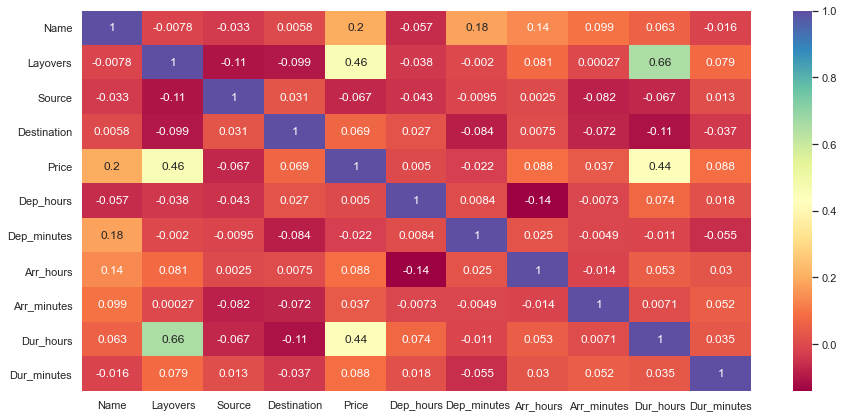

In [299]:
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,cmap="Spectral")

In [302]:
#to check if the multicollinearity between Dur_hours and Layovers needs to be reduced or not
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(xs, i) for i in range(xs.shape[1])]

In [303]:
vif

,variables,VIF
0,Name,1.079866
1,Layovers,1.817606
2,Source,1.022604
3,Destination,1.029826
4,Dep_hours,1.047489
5,Dep_minutes,1.047734
6,Arr_hours,1.046857
7,Arr_minutes,1.026171
8,Dur_hours,1.810618
9,Dur_minutes,1.015986


# Building Models: 

In [306]:
acc_max=0
rstate_max=0

for i in range(30,1000):
    x_train, x_test,y_train, y_test=train_test_split(xs,y,test_size=.25,random_state=i)
    
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>acc_max:
        acc_max=acc
        rstate_max=i

print("Best accuracy is", acc_max,"at Random State",rstate_max)

Best accuracy is 0.384489215581273 at Random State 255


In [307]:
x_train, x_test,y_train, y_test=train_test_split(xs,y,test_size=.25,random_state=255)

## Lasso Regression

In [310]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10,100],'random_state':list(range(5,15))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 5}


In [311]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

In [312]:
lss = r2_score(y_test,pred_ls)

for k in range(2,10):
    lsscore=cross_val_score(ls,xs,y,cv=k)
    lrcv=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lrcv*100)
    print("r2 score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  -8.1764093854244
r2 score is :  38.361184528699674


At cv=  3
Cross Val score :  2.869097181746494
r2 score is :  38.361184528699674


At cv=  4
Cross Val score :  7.048131625709752
r2 score is :  38.361184528699674


At cv=  5
Cross Val score :  8.440088154115239
r2 score is :  38.361184528699674


At cv=  6
Cross Val score :  6.822839835901272
r2 score is :  38.361184528699674


At cv=  7
Cross Val score :  2.1694243686035373
r2 score is :  38.361184528699674


At cv=  8
Cross Val score :  -0.38020337837096213
r2 score is :  38.361184528699674


At cv=  9
Cross Val score :  5.079778889690473
r2 score is :  38.361184528699674




At cv=  5
- Cross Val score :  8.440088154115239
- r2 score is :  38.361184528699674

In [314]:
import sklearn.metrics as metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_ls))
print('MSE:', metrics.mean_squared_error(y_test, pred_ls))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ls)))

MAE: 2201.2955460122794
MSE: 7870581.382909249
RMSE: 2805.45564622028


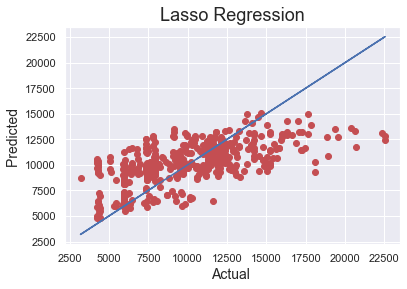

In [315]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

## Decision Tree Regressor

In [316]:
dt_reg_params = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "min_samples_split": [10, 20, 15],
              "max_depth": [5, 8, 11],
              "min_samples_leaf": [60, 40, 100],
              "max_leaf_nodes": [5,10,15]
              }
grid_dt_reg = GridSearchCV(DecisionTreeRegressor(), dt_reg_params)
grid_dt_reg.fit(x_train, y_train)

dt_reg = grid_dt_reg.best_estimator_
print("Best Estimators for Decision Tree Regression: ", grid_dt_reg.best_params_)
print("best r2 score: ",grid_dt_reg.best_score_)
print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'criterion': 'friedman_mse', 'max_depth': 8, 'max_leaf_nodes': 15, 'min_samples_leaf': 40, 'min_samples_split': 10}
best r2 score:  0.41938738902111794
------------------------------------------


In [317]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', 
                            max_depth= 8, 
                            max_leaf_nodes= 15, 
                            min_samples_leaf= 40, 
                            min_samples_split= 10)
dtr.fit(x_train, y_train)
pred_dtr= dtr.predict(x_test)

In [318]:
dtrr2 = r2_score(y_test,pred_dtr)

for k in range(2,10):
    dtrscore=cross_val_score(dtr,xs,y,cv=k)
    dtrcv=dtrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtrcv*100)
    print("r2 score is : ",dtrr2*100)
    print("\n")

At cv=  2
Cross Val score :  -36.37015216534052
r2 score is :  44.676337881779304


At cv=  3
Cross Val score :  10.19208651857979
r2 score is :  44.676337881779304


At cv=  4
Cross Val score :  0.4664940034510179
r2 score is :  44.676337881779304


At cv=  5
Cross Val score :  2.3438059517331666
r2 score is :  44.676337881779304


At cv=  6
Cross Val score :  1.8340232812325552
r2 score is :  44.676337881779304


At cv=  7
Cross Val score :  -5.662445120738013
r2 score is :  44.676337881779304


At cv=  8
Cross Val score :  4.233637934100296
r2 score is :  44.676337881779304


At cv=  9
Cross Val score :  5.694688746255702
r2 score is :  44.676337881779304




At cv=  9
- Cross Val score :  5.694688746255702
- r2 score is :  44.676337881779304

In [319]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_dtr))
print('MSE:', metrics.mean_squared_error(y_test, pred_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))

MAE: 1936.9859644962555
MSE: 7064207.541508805
RMSE: 2657.8576977537386


Text(0, 0.5, 'Y Pred')

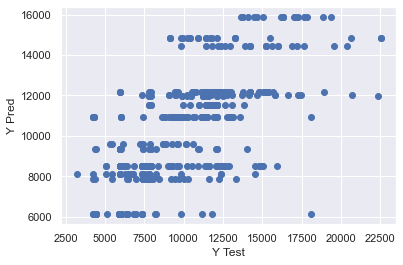

In [320]:
plt.scatter(x=y_test,y=pred_dtr)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

## Random Forest Regressor

In [321]:
rf_reg_params =  { 'max_depth': [5,7,10], "criterion": ["squared_error", "absolute_error", "poisson"],
                  'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [250,100,150,200]}
rand_rf_reg = GridSearchCV(RandomForestRegressor(), rf_reg_params)

rand_rf_reg.fit(x_train, y_train)

rf_reg = rand_rf_reg.best_estimator_
# print(rf_reg)
print("Best Estimators for Decision Tree Regression: ", rand_rf_reg.best_params_)
print("best r2 score: ",rand_rf_reg.best_score_)
print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'criterion': 'poisson', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
best r2 score:  0.3497349445940343
------------------------------------------


In [322]:
rfr = RandomForestRegressor(criterion='poisson', 
                            max_depth= 10, 
                            max_features="sqrt",
                            n_estimators=200)
rfr.fit(x_train, y_train)
pred_rfr= rfr.predict(x_test)

In [323]:
rfrr2 = r2_score(y_test,pred_dtr)

for k in range(2,10):
    rfrscore=cross_val_score(rfr,xs,y,cv=k)
    rfrcv=rfrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rfrcv*100)
    print("r2 score is : ",rfrr2*100)
    print("\n")

At cv=  2
Cross Val score :  -24.563018156709372
r2 score is :  44.676337881779304


At cv=  3
Cross Val score :  -6.31490163663782
r2 score is :  44.676337881779304


At cv=  4
Cross Val score :  -8.193136242862545
r2 score is :  44.676337881779304


At cv=  5
Cross Val score :  -3.0881334386950754
r2 score is :  44.676337881779304


At cv=  6
Cross Val score :  -4.952651286936311
r2 score is :  44.676337881779304


At cv=  7
Cross Val score :  -43.097194856804045
r2 score is :  44.676337881779304


At cv=  8
Cross Val score :  -22.023778887497958
r2 score is :  44.676337881779304


At cv=  9
Cross Val score :  -7.720887399337522
r2 score is :  44.676337881779304




At cv=  7
- Cross Val score :  -43.097194856804045
- r2 score is :  44.676337881779304

In [324]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, pred_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

MAE: 2305.5656981114385
MSE: 8332299.444731821
RMSE: 2886.5722656347652


<AxesSubplot:xlabel='Price', ylabel='Density'>

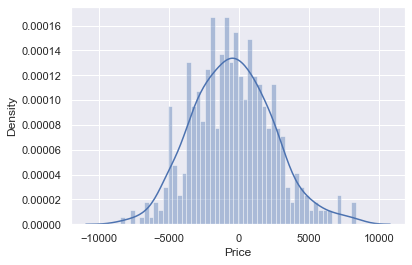

In [325]:
sns.distplot((y_test-pred_rfr),bins=50)

Text(0, 0.5, 'Y Pred')

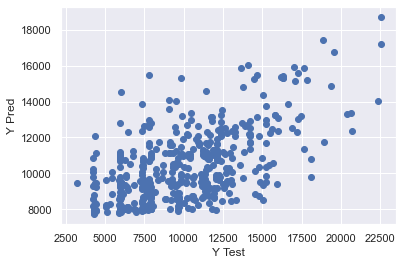

In [326]:
plt.scatter(x=y_test,y=pred_rfr)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

## XGB Regressor

In [327]:
from xgboost import XGBRegressor

In [329]:
xgb_reg_params =  {'booster' : ['gbtree','dart','gblinear'], 
                   'importance_type' : ['gain','split'],'n_estimators' : [250,200,300,350],
                   'eta' : [0.001, 0.01, 0.1,1]}
rand_xgb_reg = RandomizedSearchCV(XGBRegressor(), xgb_reg_params)

rand_xgb_reg.fit(x_train, y_train)

xgb_reg = rand_xgb_reg.best_estimator_
# print(rf_reg)
print("Best Estimators for XGB Regression: ", rand_xgb_reg.best_params_)
print("best r2 score: ",rand_xgb_reg.best_score_)
print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'n_estimators': 200, 'importance_type': 'gain', 'eta': 0.1, 'booster': 'gbtree'}
best r2 score:  0.6864079809986291
------------------------------------------


In [ ]:
xgb = XGBRegressor(n_estimators= 200, 
                   importance_type= 'gain',
                   eta=0.1, booster='gbtree')
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_xgb = xgb.predict(x_test)

In [333]:
xgbs = r2_score(y_test,pred_xgb)

for k in range(2,9):
    xgbscore=cross_val_score(xgb,xs,y,cv=k)
    xgbcv=xgbscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",xgbcv*100)
    print("r2 score is : ",xgbs*100)
    print("\n")

At cv=  2
Cross Val score :  -32.231021461641305
r2 score is :  70.65154124703409


At cv=  3
Cross Val score :  5.410048443766846
r2 score is :  70.65154124703409


At cv=  4
Cross Val score :  -0.47729570084499295
r2 score is :  70.65154124703409


At cv=  5
Cross Val score :  4.33588321475729
r2 score is :  70.65154124703409


At cv=  6
Cross Val score :  5.1634054027288325
r2 score is :  70.65154124703409


At cv=  7
Cross Val score :  -23.755913538898817
r2 score is :  70.65154124703409


At cv=  8
Cross Val score :  -19.300054422502566
r2 score is :  70.65154124703409




At cv=  2
- Cross Val score :  -32.231021461641305
- r2 score is :  70.65154124703409

In [334]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))

MAE: 1346.0690571289063
MSE: 3747467.100267762
RMSE: 1935.8375707346322


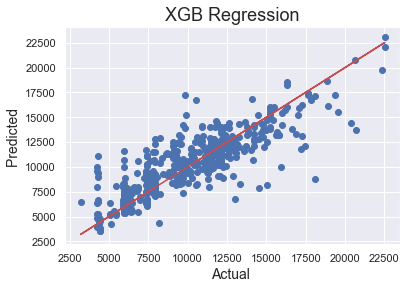

In [339]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_xgb, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('XGB Regression',fontsize=18)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

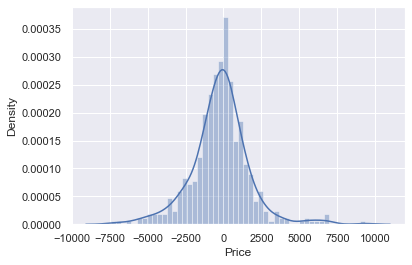

In [340]:
sns.distplot((y_test-pred_xgb),bins=50)

# Saving the model

In [342]:
import pickle
filename='Flight_price_model_internship.pickle'
pickle.dump(xgb,open(filename,'wb'))